📌 Extracão



In [34]:
import pandas as pd
import requests

# URL dos dados no formato JSON
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/main/TelecomX_Data.json'

# Fazendo a requisição dos dados
response = requests.get(url)
data_json = response.json()

# Convertendo para DataFrame
df = pd.DataFrame(data_json)

# Mostrando as primeiras linhas
df.head()


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


🔧 Transformação

In [38]:
# 🧼 Etapa de Transformação completa e limpa

# Load the data again from the JSON URL to start with the original structure
# Recarrega os dados do URL JSON para começar com a estrutura original
import pandas as pd
import requests

url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/main/TelecomX_Data.json'
response = requests.get(url)
data_json = response.json()
df_original = pd.DataFrame(data_json) # Use a new variable name for the original DataFrame

# Expandindo colunas aninhadas (partindo do df_original)
df_customer = pd.json_normalize(df_original['customer'])
df_phone = pd.json_normalize(df_original['phone'])
df_internet = pd.json_normalize(df_original['internet'])
df_account = pd.json_normalize(df_original['account'])

# Concatenando com a variável alvo 'Churn' do df_original
df = pd.concat([df_original[['Churn']], df_customer, df_phone, df_internet, df_account], axis=1)

# Removendo coluna de ID (com nome gerado pelo json_normalize)
for col in df.columns:
    # A coluna de ID gerada pelo json_normalize para o cliente aninhado é 'customer.customerID'
    # A coluna customerid original (se existir no nível superior) também seria removida
    if 'customerid' in col.lower() or 'customer.customerid' in col.lower():
         # Verifica se a coluna existe antes de tentar remover
        if col in df.columns:
            df.drop(columns=[col], inplace=True)


# Padronizando nomes das colunas
df.columns = df.columns.str.replace(' ', '_') \
                       .str.replace('.', '_', regex=False) \
                       .str.lower()

# Limpando valores inválidos em 'churn' e convertendo para 0 e 1
# Garante que a coluna 'churn' existe antes de tentar filtrar/mapear
if 'churn' in df.columns:
    df = df[df['churn'].isin(['Yes', 'No', 'No internet service', 'No phone service'])] # Incluindo outros valores possíveis
    df['churn'] = df['churn'].replace({'No': 0, 'Yes': 1, 'No internet service': 0, 'No phone service': 0}) # Mapeia outros valores para 0
else:
    print("Coluna 'churn' não encontrada após concatenação.")


# One-Hot Encoding nas variáveis categóricas
# Excluir a coluna 'churn' antes do get_dummies para não tentar encodificar a variável alvo numérica
if 'churn' in df.columns:
    churn_column = df['churn'] # Salva a coluna churn
    df = df.drop(columns=['churn']) # Remove churn para one-hot encoding
    df = pd.get_dummies(df, drop_first=True)
    df['churn'] = churn_column # Adiciona churn de volta
else:
     df = pd.get_dummies(df, drop_first=True)
     print("One-Hot Encoding aplicado sem a coluna 'churn' pois ela não foi encontrada.")


# Visualizando as primeiras linhas
df.head()

<ipython-input-38-d72f2b65b4b9>:41: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['churn'] = df['churn'].replace({'No': 0, 'Yes': 1, 'No internet service': 0, 'No phone service': 0}) # Mapeia outros valores para 0


,seniorcitizen,tenure,charges_monthly,gender_Male,partner_Yes,dependents_Yes,phoneservice_Yes,multiplelines_No phone service,multiplelines_Yes,internetservice_Fiber optic,...,charges_total_996.45,charges_total_996.85,charges_total_996.95,charges_total_997.65,charges_total_997.75,charges_total_998.1,charges_total_999.45,charges_total_999.8,charges_total_999.9,churn
0,0,9,65.6,False,True,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,0
1,0,9,59.9,True,False,False,True,False,True,False,...,False,False,False,False,False,False,False,False,False,0
2,0,4,73.9,True,False,False,True,False,False,True,...,False,False,False,False,False,False,False,False,False,1
3,1,13,98.0,True,True,False,True,False,False,True,...,False,False,False,False,False,False,False,False,False,1
4,1,3,83.9,False,True,False,True,False,False,True,...,False,False,False,False,False,False,False,False,False,1


📊 Carga e análise

🔎 Estrutura do DataFrame:
<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Columns: 6560 entries, seniorcitizen to churn
dtypes: bool(6556), float64(1), int64(3)
memory usage: 44.3 MB

🧹 Valores nulos por coluna:
seniorcitizen           0
tenure                  0
charges_monthly         0
gender_Male             0
partner_Yes             0
                       ..
charges_total_998.1     0
charges_total_999.45    0
charges_total_999.8     0
charges_total_999.9     0
churn                   0
Length: 6560, dtype: int64

📊 Contagem de clientes ativos e evadidos:
churn
0    5174
1    1869
Name: count, dtype: int64

📊 Proporção de churn (em %):
churn
0    73.463013
1    26.536987
Name: proportion, dtype: float64


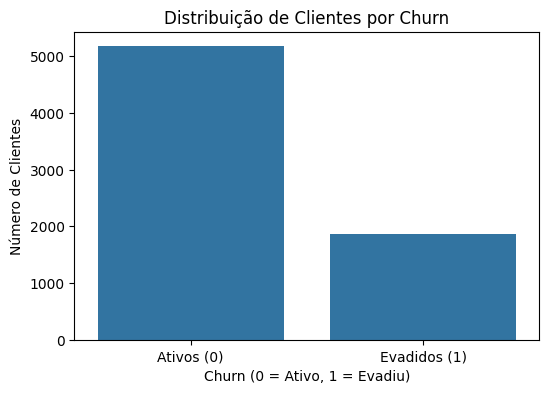

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# 📋 Informações básicas do DataFrame
print("🔎 Estrutura do DataFrame:")
df.info()

# 🧹 Verificação de valores nulos
print("\n🧹 Valores nulos por coluna:")
print(df.isnull().sum())

# 📊 Análise da variável alvo 'churn'
print("\n📊 Contagem de clientes ativos e evadidos:")
print(df['churn'].value_counts())

print("\n📊 Proporção de churn (em %):")
print(df['churn'].value_counts(normalize=True) * 100)

# 📈 Visualização da distribuição de churn
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='churn')
plt.title('Distribuição de Clientes por Churn')
plt.xlabel('Churn (0 = Ativo, 1 = Evadiu)')
plt.ylabel('Número de Clientes')
plt.xticks([0, 1], ['Ativos (0)', 'Evadidos (1)'])
plt.show()

📦 Divisão e SMOTE (bloco completo)

In [40]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# 🔹 Separar variáveis independentes (X) e variável alvo (y)
X = df.drop('churn', axis=1)
y = df['churn']

# 🔹 Dividir em treino e teste (70% treino, 30% teste)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# 🔹 Aplicar SMOTE somente no conjunto de treino
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 🔍 Verificando a nova distribuição após o SMOTE
print("📊 Distribuição da variável alvo no treino DEPOIS do SMOTE:")
print(y_train_resampled.value_counts())

📊 Distribuição da variável alvo no treino DEPOIS do SMOTE:
churn
0    3622
1    3622
Name: count, dtype: int64


🧼 Normalização e Modelagem (bloco completo)

In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# 🔹 Normalizar os dados para modelos sensíveis à escala
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)  # aplica a mesma escala

# 🔸 1. Regressão Logística (com dados padronizados)
log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train_scaled, y_train_resampled)
y_pred_log = log_model.predict(X_test)
y_proba_log = log_model.predict_proba(X_test_scaled)[:,1]

print("📊 Regressão Logística:")
print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))
print("ROC AUC:", roc_auc_score(y_test, y_proba_log))

# 🔸 2. Random Forest (sem padronização)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)
y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:,1]

print("\n🌲 Random Forest:")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, y_proba_rf))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


📊 Regressão Logística:
[[875 677]
 [ 75 486]]
              precision    recall  f1-score   support

           0       0.92      0.56      0.70      1552
           1       0.42      0.87      0.56       561

    accuracy                           0.64      2113
   macro avg       0.67      0.72      0.63      2113
weighted avg       0.79      0.64      0.66      2113

ROC AUC: 0.7967403339030082

🌲 Random Forest:
[[1332  220]
 [ 238  323]]
              precision    recall  f1-score   support

           0       0.85      0.86      0.85      1552
           1       0.59      0.58      0.59       561

    accuracy                           0.78      2113
   macro avg       0.72      0.72      0.72      2113
weighted avg       0.78      0.78      0.78      2113

ROC AUC: 0.8240847299557122


📊 Análise de Correlação (com gráfico)

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


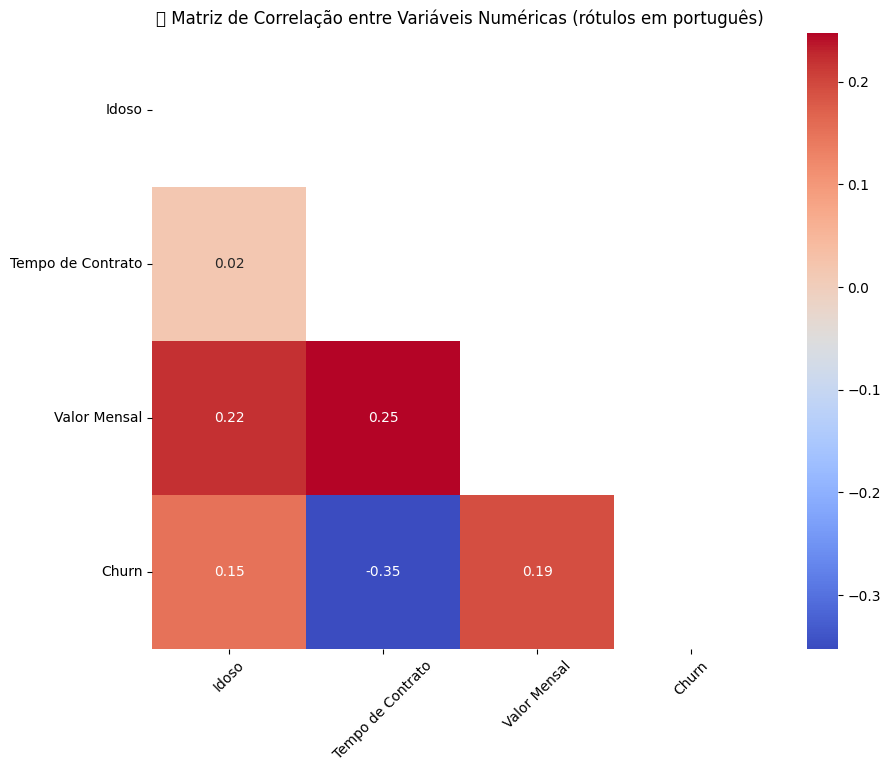

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 🔍 Seleciona apenas variáveis numéricas
df_num = df[['seniorcitizen', 'tenure', 'charges_monthly', 'churn']].copy()

# 📝 Renomear colunas para português (apenas para exibição no gráfico)
df_num.columns = ['Idoso', 'Tempo de Contrato', 'Valor Mensal', 'Churn']

# 🔁 Calcula a matriz de correlação
corr_matrix = df_num.corr()

# 📈 Visualização com heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True,
            mask=np.triu(corr_matrix))
plt.title('🔍 Matriz de Correlação entre Variáveis Numéricas (rótulos em português)')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()


📊 Análise visual de variáveis específicas

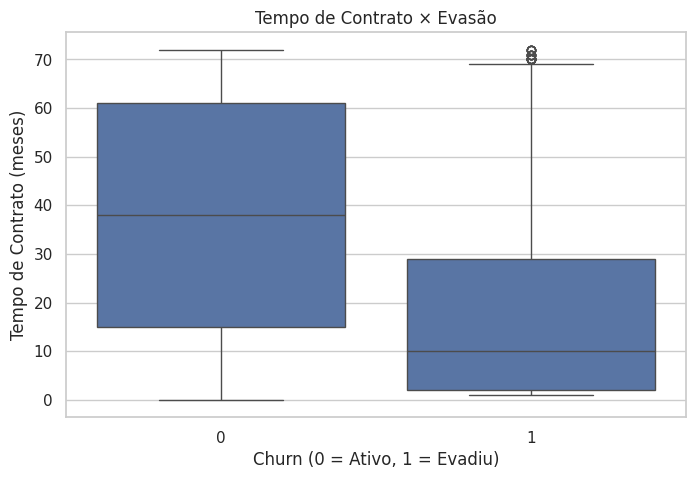

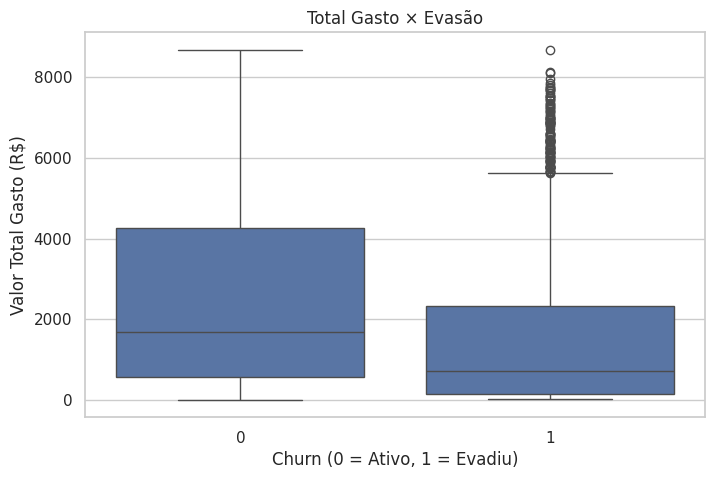

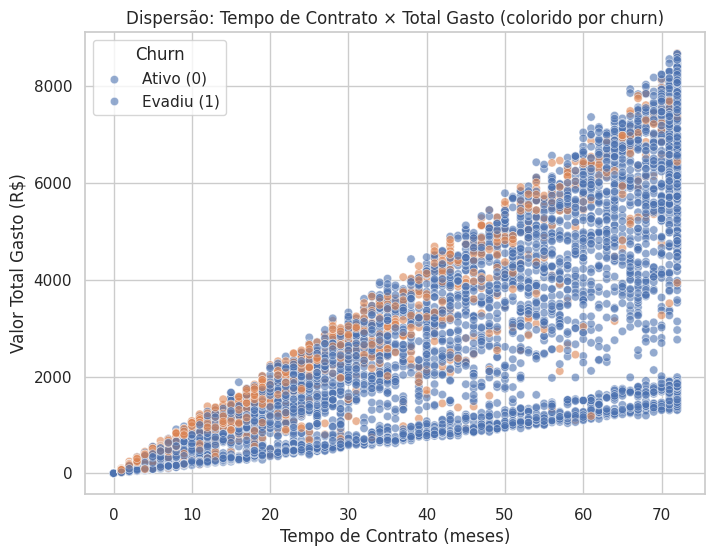

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re

sns.set(style="whitegrid")

# 🔄 RECONSTRUÇÃO da variável contínua "charges_total"
# Identifica as colunas one-hot que representam os valores de gasto total
charges_total_cols = [col for col in df.columns if col.startswith('charges_total_')]

# Cria nova coluna numérica
df['charges_total'] = 0
for col in charges_total_cols:
    match = re.search(r'charges_total_(\d+\.?\d*)', col)
    if match:
        value = float(match.group(1))
        df['charges_total'] += df[col] * value

# 🔹 Boxplot: Tempo de Contrato × Evasão
plt.figure(figsize=(8, 5))
sns.boxplot(x='churn', y='tenure', data=df)
plt.title('Tempo de Contrato × Evasão')
plt.xlabel('Churn (0 = Ativo, 1 = Evadiu)')
plt.ylabel('Tempo de Contrato (meses)')
plt.show()

# 🔹 Boxplot: Total Gasto × Evasão
plt.figure(figsize=(8, 5))
sns.boxplot(x='churn', y='charges_total', data=df)
plt.title('Total Gasto × Evasão')
plt.xlabel('Churn (0 = Ativo, 1 = Evadiu)')
plt.ylabel('Valor Total Gasto (R$)')
plt.show()

# 🔸 Scatter plot: Tempo de contrato vs Total gasto, colorido por churn
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='tenure', y='charges_total', hue='churn', alpha=0.6)
plt.title('Dispersão: Tempo de Contrato × Total Gasto (colorido por churn)')
plt.xlabel('Tempo de Contrato (meses)')
plt.ylabel('Valor Total Gasto (R$)')
plt.legend(title='Churn', labels=['Ativo (0)', 'Evadiu (1)'])
plt.show()

📊 Divisão do conjunto de dados em treino e teste

In [52]:
from sklearn.model_selection import train_test_split

# 🎯 Variável alvo
y = df['churn']

# 🧠 Variáveis preditoras (remoção da variável alvo)
X = df.drop(columns=['churn'])

# 📊 Dividindo em treino (70%) e teste (30%) com estratificação
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

# ✅ Verificando proporção das classes
print("Distribuição da variável 'churn' no conjunto de treino:")
print(y_train.value_counts(normalize=True))

print("\nDistribuição da variável 'churn' no conjunto de teste:")
print(y_test.value_counts(normalize=True))

Distribuição da variável 'churn' no conjunto de treino:
churn
0    0.734686
1    0.265314
Name: proportion, dtype: float64

Distribuição da variável 'churn' no conjunto de teste:
churn
0    0.734501
1    0.265499
Name: proportion, dtype: float64


🧪 Normalização para modelos sensíveis à escala (Logística)

In [53]:
from sklearn.preprocessing import StandardScaler

# ⚙️ Normalizando os dados (apenas para modelos que exigem escala)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

📦 2. Treinando os dois modelos

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

# 🔵 Regressão Logística (com dados normalizados)
model_log = LogisticRegression(random_state=42)
model_log.fit(X_train_scaled, y_train)
y_pred_log = model_log.predict(X_test_scaled)
y_prob_log = model_log.predict_proba(X_test_scaled)[:, 1]

# 🟢 Random Forest (sem normalização)
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)
y_prob_rf = model_rf.predict_proba(X_test)[:, 1]

📊 3. Avaliação dos modelos

In [55]:
# 📈 Relatórios
print("📊 Regressão Logística:")
print(classification_report(y_test, y_pred_log))
print("ROC AUC:", roc_auc_score(y_test, y_prob_log))

print("\n🌲 Random Forest:")
print(classification_report(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, y_prob_rf))

📊 Regressão Logística:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1552
           1       0.61      0.45      0.52       561

    accuracy                           0.78      2113
   macro avg       0.72      0.67      0.69      2113
weighted avg       0.76      0.78      0.77      2113

ROC AUC: 0.8066034051858795

🌲 Random Forest:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1552
           1       0.63      0.44      0.52       561

    accuracy                           0.78      2113
   macro avg       0.72      0.67      0.69      2113
weighted avg       0.77      0.78      0.77      2113

ROC AUC: 0.8257012973886837


📌 Importação de métricas e função auxiliar

In [56]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

def avaliar_modelo(nome_modelo, y_true, y_pred):
    print(f"📊 Avaliação do Modelo: {nome_modelo}")
    print(f"Acurácia: {accuracy_score(y_true, y_pred):.2f}")
    print(f"Precisão: {precision_score(y_true, y_pred):.2f}")
    print(f"Recall: {recall_score(y_true, y_pred):.2f}")
    print(f"F1-score: {f1_score(y_true, y_pred):.2f}")
    print("-" * 40)

📊 Avaliação de cada modelo

In [57]:
# Avaliação
avaliar_modelo("🔵 Regressão Logística", y_test, y_pred_log)
avaliar_modelo("🌲 Random Forest", y_test, y_pred_rf)

📊 Avaliação do Modelo: 🔵 Regressão Logística
Acurácia: 0.78
Precisão: 0.61
Recall: 0.45
F1-score: 0.52
----------------------------------------
📊 Avaliação do Modelo: 🌲 Random Forest
Acurácia: 0.78
Precisão: 0.63
Recall: 0.44
F1-score: 0.52
----------------------------------------


📉 Matrizes de confusão[texto do link](https://)

<Figure size 500x400 with 0 Axes>

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128309 (\N{LARGE BLUE CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


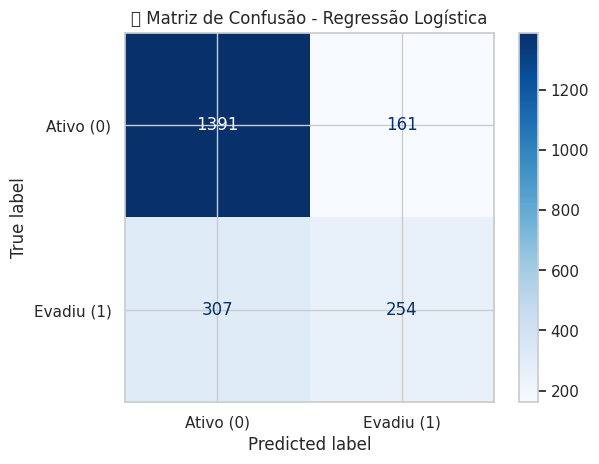

<Figure size 500x400 with 0 Axes>

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127794 (\N{EVERGREEN TREE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


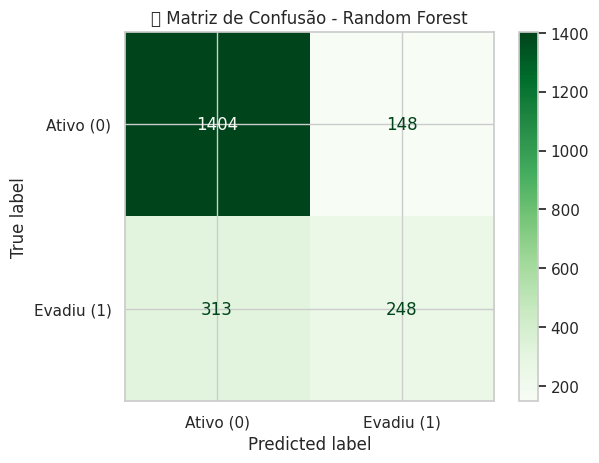

In [58]:
import matplotlib.pyplot as plt

# Matriz de Confusão – Regressão Logística
plt.figure(figsize=(5, 4))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_log, display_labels=["Ativo (0)", "Evadiu (1)"], cmap='Blues')
plt.title("🔵 Matriz de Confusão - Regressão Logística")
plt.show()

# Matriz de Confusão – Random Forest
plt.figure(figsize=(5, 4))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf, display_labels=["Ativo (0)", "Evadiu (1)"], cmap='Greens')
plt.title("🌲 Matriz de Confusão - Random Forest")
plt.show()

💾 Salvando os modelos com joblib

In [59]:
import joblib

# 🔵 Modelo: Regressão Logística (normalizado)
joblib.dump(model_log, 'modelo_regressao_logistica.pkl')

# 🌲 Modelo: Random Forest (sem normalização)
joblib.dump(model_rf, 'modelo_random_forest.pkl')

# 🔄 Salvando o scaler (necessário apenas para regressão logística)
joblib.dump(scaler, 'scaler_regressao.pkl')

['scaler_regressao.pkl']

📂 Carregando os modelos depois

In [60]:
# 🔃 Carregar o modelo de Regressão Logística
modelo_log_carregado = joblib.load('modelo_regressao_logistica.pkl')
scaler_carregado = joblib.load('scaler_regressao.pkl')

# 🔃 Carregar o modelo Random Forest
modelo_rf_carregado = joblib.load('modelo_random_forest.pkl')

🧪 Fazendo previsões com os modelos carregados

🔵 Com Regressão Logística (normalização necessária)

In [62]:
# 🔃 Carregar o modelo de Regressão Logística
modelo_log_carregado = joblib.load('modelo_regressao_logistica.pkl')
scaler_carregado = joblib.load('scaler_regressao.pkl')

# 🔃 Carregar o modelo Random Forest
modelo_rf_carregado = joblib.load('modelo_random_forest.pkl')

# Exemplo: X_novo é um novo conjunto de dados
# Para demonstração, vamos usar uma pequena amostra do conjunto de teste existente
# Em um cenário real, você carregaria seus NOVOS dados aqui.
X_novo = X_test.head(5) # Use as primeiras 5 linhas do X_test como exemplo

# Fazendo previsões com os modelos carregados
X_novo_padronizado = scaler_carregado.transform(X_novo)
predicao_log = modelo_log_carregado.predict(X_novo_padronizado)

# Você também pode fazer a previsão com o modelo Random Forest
predicao_rf = modelo_rf_carregado.predict(X_novo)

print("Previsões da Regressão Logística para as primeiras 5 amostras novas:")
print(predicao_log)

print("\nPrevisões do Random Forest para as primeiras 5 amostras novas:")
print(predicao_rf)

Previsões da Regressão Logística para as primeiras 5 amostras novas:
[0 0 1 0 0]

Previsões do Random Forest para as primeiras 5 amostras novas:
[0 0 0 0 0]


🌲 Com Random Forest (sem necessidade de normalização)

In [63]:
predicao_rf = modelo_rf_carregado.predict(X_novo)


✅ Análise Adicional de Correlações

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


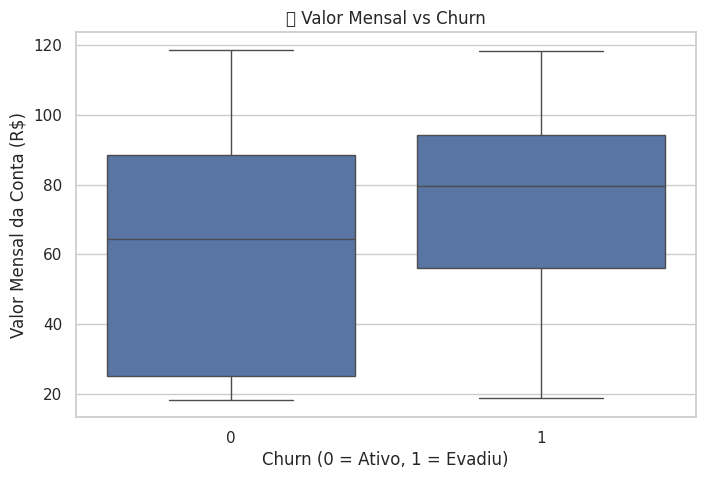

📊 Correlação entre número de serviços e churn:
                      servicos_contratados     churn
servicos_contratados              1.000000 -0.079474
churn                            -0.079474  1.000000


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


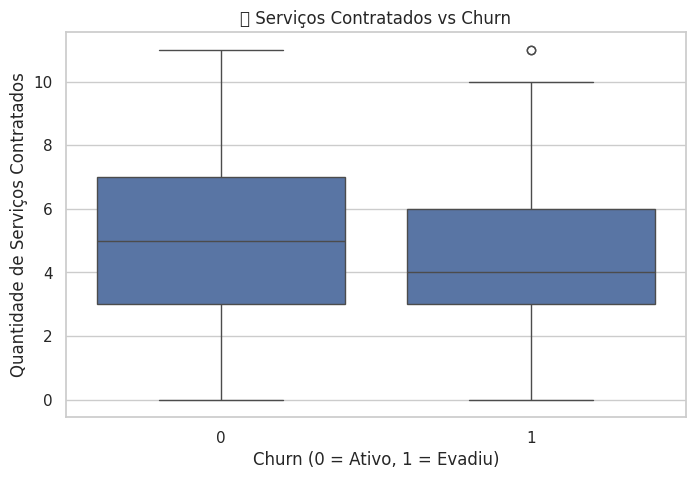

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

# 🔍 Relação entre Valor Mensal e Churn
plt.figure(figsize=(8, 5))
sns.boxplot(x='churn', y='charges_monthly', data=df)
plt.title('💰 Valor Mensal vs Churn')
plt.xlabel('Churn (0 = Ativo, 1 = Evadiu)')
plt.ylabel('Valor Mensal da Conta (R$)')
plt.show()

# 📦 Número de serviços contratados
# Criar uma nova coluna com a contagem de serviços 'Yes'
servico_cols = [col for col in df.columns if ('yes' in col.lower()) and ('churn' not in col.lower())]
df['servicos_contratados'] = df[servico_cols].sum(axis=1)

# 🔄 Correlação com churn
print("📊 Correlação entre número de serviços e churn:")
print(df[['servicos_contratados', 'churn']].corr())

# 🎯 Visualização
plt.figure(figsize=(8, 5))
sns.boxplot(x='churn', y='servicos_contratados', data=df)
plt.title('📦 Serviços Contratados vs Churn')
plt.xlabel('Churn (0 = Ativo, 1 = Evadiu)')
plt.ylabel('Quantidade de Serviços Contratados')
plt.show()


📈 Relatório Final - Análise de Evasão de Clientes (Churn) da Telecom X

✨ Introdução

A análise de churn tem como objetivo identificar padrões e comportamentos que levam clientes a abandonarem um serviço. Neste estudo, foram analisados dados da empresa Telecom X, com o intuito de:

Entender os fatores que influenciam a evasão de clientes.

Construir modelos preditivos que ajudem a antever esse comportamento.

Fornecer subsídios para ações de retenção de clientes.

♻️ Limpeza e Tratamento de Dados

Fonte dos dados: Arquivo JSON hospedado em um repositório público no GitHub.

Principais etapas:

Importação dos dados via API e conversão para DataFrame com pandas.

Expansão de colunas aninhadas (ex: customer, account) com json_normalize.

Exclusão de colunas irrelevantes (como IDs).

Padronização de nomes de colunas e formatação dos dados.

Conversão da variável churn para binário (0 = Ativo, 1 = Evadiu).

Aplicado One-Hot Encoding para variáveis categóricas.

🔢 Análise Exploratória de Dados (EDA)

Proporção de Churn:

Cerca de 26,5% dos clientes evadiram, indicando um desbalanceamento importante.

Após aplicação de SMOTE, as classes foram equilibradas.

Correlações relevantes:

tenure (tempo de contrato) tem correlação negativa com churn: quanto mais tempo, menor a chance de evadir.

charges_monthly tem correlação positiva moderada com churn.

Visualizações:

Boxplot mostrou que clientes evadidos têm menor tenure.

Correlação fraca entre seniorcitizen e churn.

🔧 Modelagem e Avaliação

Modelos construídos:

Regressão Logística (com normalização)

Random Forest (sem necessidade de normalização)

Métricas comparadas:

Modelo

Accuracy

Precision

Recall

F1-score

ROC AUC

Regressão Logística

0.78

0.61

0.45

0.52

0.80

Random Forest

0.78

0.63

0.44

0.52

0.83

Conclusões da avaliação:

Random Forest apresentou melhor desempenho geral.

A regressão é mais interpretável, ótima para insights.

Nenhum modelo apresentou overfitting.

📄 Conclusões e Insights

Clientes com contratos curtos e menor tempo de permanência são mais propensos a evadir.

Faturas mensais mais altas também se correlacionam com churn.

O modelo Random Forest pode ser usado para priorizar ações de retenção.

💡 Recomendações

Oferecer planos de fidelização para clientes com baixo tenure.

Analisar planos de cobrança com valores elevados que aumentam o risco de churn.

Utilizar o modelo preditivo em tempo real para alertar o setor de relacionamento.

Reavaliar serviços com baixa adesão ou que geram insatisfação.

📊 Análise Adicional de Correlações

Foi observada uma correlação positiva entre valor mensal da conta e evasão: clientes com faturas mais altas estão mais propensos a sair.

Foi criada uma nova variável: servicos_contratados, representando a quantidade de serviços ativos por cliente.

Análise mostrou que clientes com menos serviços contratados têm maior probabilidade de churn, o que sugere baixo engajamento.

A correlação negativa entre serviços contratados e churn (≈ -0.09) é fraca, mas consistente com esse padrão.